# Importing Libraries & Loading Data

In [1]:
#import libres
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from rake_nltk import Rake
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import re




In [2]:
# Reading the dataset
original_data = pd.read_csv('/Users/dsuser37/Downloads/stc_sda_datathon.csv')


# Explore the data

In [3]:
# We want to see what the columns we have 
original_data.columns

Index(['Unnamed: 0', 'date_', 'user_id_maped', 'program_id', 'program_name',
       'duration_seconds', 'program_class', 'season', 'episode',
       'program_desc', 'program_genre', 'series_title', 'hd', 'original_name'],
      dtype='object')

In [4]:
#  We want to see the top rows
original_data.head()

,Unnamed: 0,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,0.0,1.0,The Boss Baby
1,1,2017-05-27,26138.0,M0005792SD,100 Streets,40,MOVIE,0.0,0.0,Drama Movie100 Streets,Drama,0.0,0.0,100 Streets
2,2,2017-09-16,19082.0,S000805901001,"Heroes Reborn, Brave New World",1692,SERIES/EPISODES,1.0,1.0,Drama MovieBrave New World (HD),Drama,0.0,0.0,"Heroes Reborn, S01"
3,3,2017-05-21,7946.0,M0004410,Moana (HD),17,MOVIE,0.0,0.0,Animation MovieMoana (HD),Animation,0.0,1.0,Moana
4,4,2017-08-10,7418.0,M0005895,The Mermaid Princess (HD),8,MOVIE,0.0,0.0,Animation MovieThe Mermaid Princess (HD),Animation,0.0,1.0,The Mermaid Princess


In [5]:
# Then we want to see what is the columns data types
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359886 entries, 0 to 4359885
Data columns (total 14 columns):
Unnamed: 0          int64
date_               object
user_id_maped       float64
program_id          object
program_name        object
duration_seconds    int64
program_class       object
season              float64
episode             float64
program_desc        object
program_genre       object
series_title        float64
hd                  float64
original_name       object
dtypes: float64(5), int64(2), object(7)
memory usage: 465.7+ MB


In [6]:
original_data.describe()

,Unnamed: 0,user_id_maped,duration_seconds,season,episode,series_title,hd
count,4.359886e+06,4.359886e+06,4.359886e+06,4.359886e+06,4.359886e+06,4.359886e+06,4.359886e+06
mean,2.179942e+06,1.729343e+04,1.135164e+03,1.334486e+00,6.641422e+00,1.306915e-02,3.813091e-01
std,1.258591e+06,9.929986e+03,6.108689e+03,2.091462e+00,1.291271e+01,1.135709e-01,4.857083e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.089971e+06,8.610000e+03,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.179942e+06,1.721800e+04,1.170000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,3.269914e+06,2.569100e+04,1.319000e+03,1.000000e+00,1.000000e+01,0.000000e+00,1.000000e+00
max,4.359885e+06,3.428300e+04,2.053603e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


# Data Wrangling

In [7]:
# Drop cloumns : Unnamed , program_id , program_class , program_dec , series_title and hd
sa=original_data.drop(original_data.columns[[0,3,6,9,11,12]],axis=1)


In [8]:
sa.head()

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name
0,2017-08-16,6928.0,The Boss Baby (HD),17,0.0,0.0,Animation,The Boss Baby
1,2017-05-27,26138.0,100 Streets,40,0.0,0.0,Drama,100 Streets
2,2017-09-16,19082.0,"Heroes Reborn, Brave New World",1692,1.0,1.0,Drama,"Heroes Reborn, S01"
3,2017-05-21,7946.0,Moana (HD),17,0.0,0.0,Animation,Moana
4,2017-08-10,7418.0,The Mermaid Princess (HD),8,0.0,0.0,Animation,The Mermaid Princess


In [9]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359886 entries, 0 to 4359885
Data columns (total 8 columns):
date_               object
user_id_maped       float64
program_name        object
duration_seconds    int64
season              float64
episode             float64
program_genre       object
original_name       object
dtypes: float64(3), int64(1), object(4)
memory usage: 266.1+ MB


In [10]:
# change the columns type
sa['user_id_maped'] = sa.user_id_maped.astype(int)
sa['season']= sa.season.astype(int)
sa['episode']=sa.episode.astype(int)

In [11]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359886 entries, 0 to 4359885
Data columns (total 8 columns):
date_               object
user_id_maped       int32
program_name        object
duration_seconds    int64
season              int32
episode             int32
program_genre       object
original_name       object
dtypes: int32(3), int64(1), object(4)
memory usage: 216.2+ MB


In [12]:
sa.head()

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name
0,2017-08-16,6928,The Boss Baby (HD),17,0,0,Animation,The Boss Baby
1,2017-05-27,26138,100 Streets,40,0,0,Drama,100 Streets
2,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01"
3,2017-05-21,7946,Moana (HD),17,0,0,Animation,Moana
4,2017-08-10,7418,The Mermaid Princess (HD),8,0,0,Animation,The Mermaid Princess


In [13]:
# we whant to see all the genre 
sa['program_genre'].unique()

array(['Animation', 'Drama', 'Biography', 'Action', 'Comedy', 'Horror',
       'NOT_DEFINED_IN_UMS', 'Thriller', 'Documentary', 'Family', 'Crime',
       'Romance', 'Sci-Fi', 'Adventure',
       'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 'Wrestling'], dtype=object)

In [14]:
sa[sa['original_name']=='Dunkirk']

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name
79,2018-01-02,21795,Dunkirk (HD),6433,0,0,NOT_DEFINED_IN_UMS,Dunkirk
303,2018-01-07,2711,Dunkirk (HD),75,0,0,NOT_DEFINED_IN_UMS,Dunkirk
305,2018-04-14,22430,Dunkirk (HD),15,0,0,NOT_DEFINED_IN_UMS,Dunkirk
335,2018-02-17,8074,Dunkirk (HD),47,0,0,NOT_DEFINED_IN_UMS,Dunkirk
389,2018-02-20,33768,Dunkirk (HD),1,0,0,NOT_DEFINED_IN_UMS,Dunkirk
...,...,...,...,...,...,...,...,...
4352811,2018-03-17,31711,Dunkirk (HD),0,0,0,NOT_DEFINED_IN_UMS,Dunkirk
4355237,2018-01-08,22535,Dunkirk (HD),82,0,0,NOT_DEFINED_IN_UMS,Dunkirk
4355401,2018-01-08,22535,Dunkirk (HD),76,0,0,NOT_DEFINED_IN_UMS,Dunkirk
4359811,2018-04-19,12505,Dunkirk (HD),81,0,0,NOT_DEFINED_IN_UMS,Dunkirk


In [15]:
sa.replace("NOT_DEFINED_IN_UMS", 
           "Action", 
           inplace=True)


In [16]:
sa[sa['original_name']=='Dunkirk']

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name
79,2018-01-02,21795,Dunkirk (HD),6433,0,0,Action,Dunkirk
303,2018-01-07,2711,Dunkirk (HD),75,0,0,Action,Dunkirk
305,2018-04-14,22430,Dunkirk (HD),15,0,0,Action,Dunkirk
335,2018-02-17,8074,Dunkirk (HD),47,0,0,Action,Dunkirk
389,2018-02-20,33768,Dunkirk (HD),1,0,0,Action,Dunkirk
...,...,...,...,...,...,...,...,...
4352811,2018-03-17,31711,Dunkirk (HD),0,0,0,Action,Dunkirk
4355237,2018-01-08,22535,Dunkirk (HD),82,0,0,Action,Dunkirk
4355401,2018-01-08,22535,Dunkirk (HD),76,0,0,Action,Dunkirk
4359811,2018-04-19,12505,Dunkirk (HD),81,0,0,Action,Dunkirk


In [17]:
sa.head()

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name
0,2017-08-16,6928,The Boss Baby (HD),17,0,0,Animation,The Boss Baby
1,2017-05-27,26138,100 Streets,40,0,0,Drama,100 Streets
2,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01"
3,2017-05-21,7946,Moana (HD),17,0,0,Animation,Moana
4,2017-08-10,7418,The Mermaid Princess (HD),8,0,0,Animation,The Mermaid Princess


In [18]:
# count how many views for each movie or series 
views = sa.groupby(['original_name','episode','season'])['user_id_maped'].count().reset_index(name='count')

In [19]:
views

,original_name,episode,season,count
0,#FollowFriday,0,0,1604
1,10 Days in a Madhouse,0,0,1937
2,"10,000 B.C.",0,0,311
3,100 Streets,0,0,4113
4,101 Dalmatians,0,0,498
...,...,...,...,...
13135,"iCarly, S01",10,1,452
13136,"iCarly, S01",11,1,548
13137,"iCarly, S01",12,1,650
13138,xXx,0,0,340


In [20]:
xx=sa.groupby(['original_name','episode','season'])['user_id_maped'].transform('count')

In [21]:
sa['views']=xx

In [22]:
sa.head()

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views
0,2017-08-16,6928,The Boss Baby (HD),17,0,0,Animation,The Boss Baby,89010
1,2017-05-27,26138,100 Streets,40,0,0,Drama,100 Streets,4113
2,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876
3,2017-05-21,7946,Moana (HD),17,0,0,Animation,Moana,28255
4,2017-08-10,7418,The Mermaid Princess (HD),8,0,0,Animation,The Mermaid Princess,24407


In [23]:

sa[sa['original_name']=='PAW Patrol, S01']

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views
67,2017-12-17,730,"PAW Patrol, Pups And The Ghost Pirate",1388,1,10,Animation,"PAW Patrol, S01",5007
200,2018-03-08,11090,"PAW Patrol, Pups Save A Pool Day / Circus Pup ...",1514,1,17,Animation,"PAW Patrol, S01",4273
501,2018-01-16,16150,"PAW Patrol, Pups Save The Sea Turtles",1386,1,2,Animation,"PAW Patrol, S01",6732
653,2017-11-13,7235,"PAW Patrol, Pups And The Kitty-Tastrophe",1386,1,3,Animation,"PAW Patrol, S01",6139
671,2017-12-16,18960,"PAW Patrol, Pups Save Christmas",1384,1,11,Animation,"PAW Patrol, S01",5047
...,...,...,...,...,...,...,...,...,...
4359441,2017-11-19,8715,"PAW Patrol, Pups Get A Rubble / Pups Save A Wa...",1386,1,12,Animation,"PAW Patrol, S01",4983
4359487,2017-11-19,8715,"PAW Patrol, Pups Save The Easter Egg Hunt",1388,1,18,Animation,"PAW Patrol, S01",4135
4359521,2017-11-13,8715,"PAW Patrol, Pups Save The Camping Trip",1386,1,22,Animation,"PAW Patrol, S01",4004
4359548,2018-01-16,8715,"PAW Patrol, Pups Save The Circus / Pup A Doodl...",1354,1,7,Animation,"PAW Patrol, S01",5237


In [24]:
# count how many views for genre 
movcc = pd.DataFrame(sa['program_genre'].value_counts()).reset_index()
movcc.columns = ['program_genre','count']
movcc.head(25)

,program_genre,count
0,Animation,1721579
1,Action,747635
2,Drama,652454
3,Comedy,554480
4,Horror,260582
5,Thriller,167474
6,Family,116116
7,Documentary,63917
8,Biography,55316
9,Crime,11520


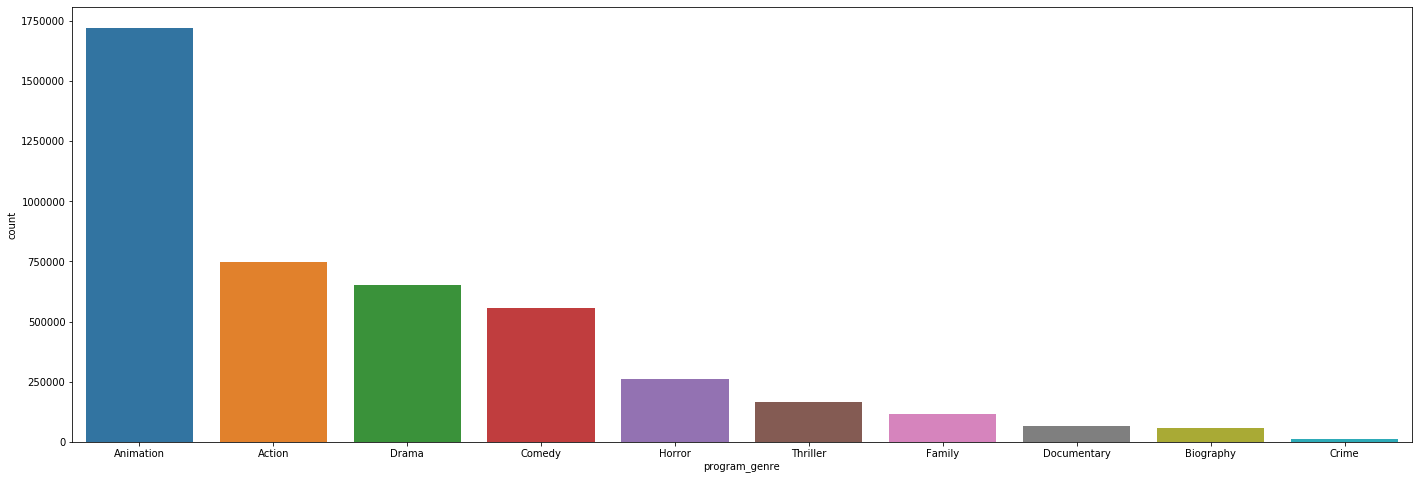

In [25]:
plt.figure(figsize=(24,8))
sns.barplot(x='program_genre',y='count',data=movcc.head(10))
plt.show()

In [26]:
# drop least of 5 min 
sa.drop(sa[sa['duration_seconds'] < 300].index,inplace= True)

In [27]:
sa[sa['duration_seconds'] >= 0][['user_id_maped','duration_seconds', 'original_name']].sort_values('duration_seconds').head()

,user_id_maped,duration_seconds,original_name
143001,16247,300,"Friends, S10"
1468213,13694,300,"The Thundermans, S01"
3485169,7125,300,"Save-Ums! , Season 1"
1222174,32619,300,"Pingu, Season 5"
3369886,29799,300,"My Little Pony: Friendship Is Magic, S06"


In [28]:
sa[sa['duration_seconds'] > 0][['duration_seconds', 'original_name']].sort_values('duration_seconds',ascending=False).head()

,duration_seconds,original_name
2147681,2053603,War for the Planet of the Apes
432965,1461329,Escobar: Paradise Lost
3887787,1256345,"Damages, S01"
311419,1254835,"Blindspot, S01"
385412,1147698,"Friends, S08"


In [29]:
#drop iteam least 4 hours 
sa.drop(sa[sa['duration_seconds'] > 14400].index,inplace= True)

In [30]:
# max of duration 
duration_full = sa.groupby(['original_name','season','episode'])['duration_seconds'].max().reset_index(name='ftime')

In [31]:
duration_full

,original_name,season,episode,ftime
0,#FollowFriday,0,0,13592
1,10 Days in a Madhouse,0,0,13136
2,"10,000 B.C.",0,0,9436
3,100 Streets,0,0,13882
4,101 Dalmatians,0,0,11185
...,...,...,...,...
12379,"iCarly, S01",1,10,11248
12380,"iCarly, S01",1,11,8960
12381,"iCarly, S01",1,12,11938
12382,xXx,0,0,8491


In [32]:
ss =sa.groupby(['original_name','season','episode'])['duration_seconds'].transform('max')
sa['duration_full']=ss
sa.head(50)

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full
2,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186
29,2017-12-03,19694,"Hell On Wheels, The White Spirit",2650,2,7,Drama,"Hell On Wheels, S02",189,10011
34,2017-08-30,25404,Land Of The Dead (HD),3553,0,0,Horror,Land Of The Dead,4225,14078
67,2017-12-17,730,"PAW Patrol, Pups And The Ghost Pirate",1388,1,10,Animation,"PAW Patrol, S01",5007,14132
68,2017-10-25,3952,Baywatch (HD),1153,0,0,Comedy,Baywatch,25761,14311
79,2018-01-02,21795,Dunkirk (HD),6433,0,0,Action,Dunkirk,12855,12497
81,2017-11-18,29034,Pitch Black (HD),6236,0,0,Thriller,Pitch Black,2325,14331
87,2018-02-10,28361,Cloudy With a Chance of Meatballs 2,571,0,0,Animation,Cloudy With a Chance of Meatballs 2,8691,14390
88,2017-03-24,13189,Tom And Jerry: Santa's Little Helpers (HD),1265,0,0,Animation,Tom And Jerry: Santa's Little Helpers,2428,9490
91,2017-10-31,5094,"Zoo, S03 , Ten Years Gone",2403,3,3,Action,"Zoo, S03",181,9099


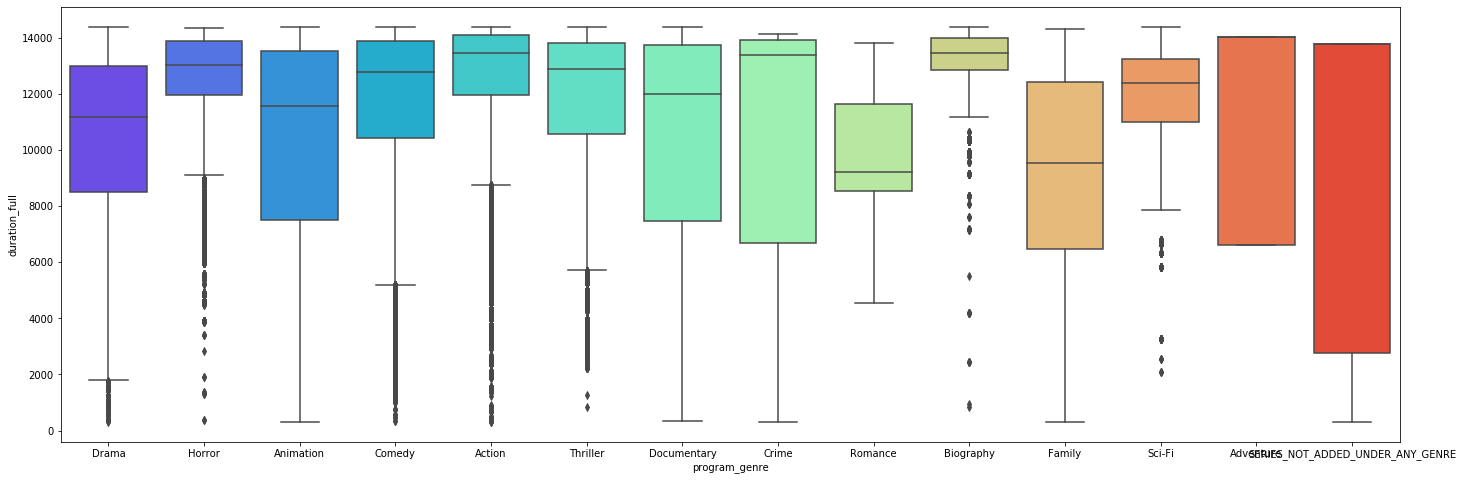

In [33]:
plt.figure(figsize=(24,8))
sns.boxplot(x='program_genre',y='duration_full',data=sa,palette='rainbow')
plt.show()

In [34]:
sa['user_id_maped'].value_counts()

14263    9189
11372    8664
13293    7709
29320    7635
6719     7132
         ... 
17172       1
24730       1
32531       1
12057       1
31122       1
Name: user_id_maped, Length: 14516, dtype: int64

In [35]:
# delet for each user sae 1 movie 
sa['user_countt'] = sa.groupby('user_id_maped')['user_id_maped'].transform('size')
sa.head

<bound method NDFrame.head of               date_  user_id_maped                            program_name  \
2        2017-09-16          19082         Heroes Reborn, Brave New World    
29       2017-12-03          19694       Hell On Wheels, The White Spirit    
34       2017-08-30          25404                   Land Of The Dead (HD)   
67       2017-12-17            730  PAW Patrol, Pups And The Ghost Pirate    
68       2017-10-25           3952                           Baywatch (HD)   
...             ...            ...                                     ...   
4359582  2017-10-15           8715      Kihil Aswad, Qalb Abyad, S01, Ep21   
4359584  2017-10-19           8715       Kihil Aswad, Qalb Abyad, S01, Ep9   
4359706  2017-10-10          14606                 Kong: Skull Island (HD)   
4359728  2017-10-10          14606                 Kong: Skull Island (HD)   
4359737  2017-08-11          14606   The Jetsons & WWE: Robo-WrestleMania!   

         duration_seconds  season

In [36]:
sa=sa[sa['user_countt']>1]

In [37]:
sa['user_countt']==1

2          False
29         False
34         False
67         False
68         False
           ...  
4359582    False
4359584    False
4359706    False
4359728    False
4359737    False
Name: user_countt, Length: 1909962, dtype: bool

In [38]:
sa['user_id_maped'].value_counts()

14263    9189
11372    8664
13293    7709
29320    7635
6719     7132
         ... 
7779        2
10144       2
15786       2
13387       2
32039       2
Name: user_id_maped, Length: 12224, dtype: int64

In [39]:
sa.user_id_maped.nunique()

12224

In [40]:
sa.original_name.nunique()

2166

In [41]:
sa.shape

(1909962, 11)

In [42]:
original_data.shape

(4359886, 14)

In [43]:
mov_max = pd.DataFrame(sa['original_name'].value_counts()).reset_index()
mov_max.columns = ['original_name','top_movie']
mov_max.head(25)

,original_name,top_movie
0,"PAW Patrol, S01",107738
1,"Blaze And The Monster Machines, S01",64690
2,"Marcus Level, S01(T)",48559
3,SpongeBob SquarePants,47007
4,"Oscar's Oasis, Season 1",45263
5,"Dora the Explorer, S07",41910
6,"Yo Gabba Gabba!, S01",34756
7,"Pingu, Season 6",34480
8,"Jelly Jamm, S01(T)",32540
9,"Shimmer And Shine, S01",29888


In [44]:
# find user_rating 
culc_1= sa['duration_seconds']/sa['duration_full']
culc_2=culc_1*100
culc_2.head()

2     11.927252
29    26.470882
34    25.237960
67     9.821681
68     8.056740
dtype: float64

In [45]:
sa['culclation_1']= culc_2
sa.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1
2,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252
29,2017-12-03,19694,"Hell On Wheels, The White Spirit",2650,2,7,Drama,"Hell On Wheels, S02",189,10011,85,26.470882
34,2017-08-30,25404,Land Of The Dead (HD),3553,0,0,Horror,Land Of The Dead,4225,14078,8,25.237960
67,2017-12-17,730,"PAW Patrol, Pups And The Ghost Pirate",1388,1,10,Animation,"PAW Patrol, S01",5007,14132,1272,9.821681
68,2017-10-25,3952,Baywatch (HD),1153,0,0,Comedy,Baywatch,25761,14311,7,8.056740


In [46]:
user_rat = []

for row in sa['culclation_1']:
    if row >= 85:
        user_rat.append(5)
    elif row >= 70:
        user_rat.append(4)
    elif row >= 55:
        user_rat.append(3)
    elif row >= 40:
        user_rat.append(2)
    else:
        user_rat.append(1)
        
sa['user_rating'] = user_rat
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [47]:
sa.head()

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating
2,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252,1
29,2017-12-03,19694,"Hell On Wheels, The White Spirit",2650,2,7,Drama,"Hell On Wheels, S02",189,10011,85,26.470882,1
34,2017-08-30,25404,Land Of The Dead (HD),3553,0,0,Horror,Land Of The Dead,4225,14078,8,25.237960,1
67,2017-12-17,730,"PAW Patrol, Pups And The Ghost Pirate",1388,1,10,Animation,"PAW Patrol, S01",5007,14132,1272,9.821681,1
68,2017-10-25,3952,Baywatch (HD),1153,0,0,Comedy,Baywatch,25761,14311,7,8.056740,1


In [48]:
# find  movie_rating
sda =pd.DataFrame(sa.groupby('original_name')['user_rating'].mean())

In [49]:

sda['movie_rating']=pd.DataFrame(sa.groupby('original_name')['user_rating'].mean())

In [50]:
sa1=sa

In [51]:
result = pd.merge(sa1,
                 sda[['movie_rating']],
                 on='original_name')


In [52]:
result.head(50)

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating,movie_rating
0,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252,1,1.103983
1,2017-09-17,19082,"Heroes Reborn, The Lions Den",1307,1,5,Drama,"Heroes Reborn, S01",223,12632,336,10.346738,1,1.103983
2,2017-09-20,24939,"Heroes Reborn, Odessa",935,1,2,Drama,"Heroes Reborn, S01",319,12050,117,7.759336,1,1.103983
3,2017-09-16,19082,"Heroes Reborn, Odessa",2477,1,2,Drama,"Heroes Reborn, S01",319,12050,336,20.556017,1,1.103983
4,2017-07-04,17292,"Heroes Reborn, Odessa",2542,1,2,Drama,"Heroes Reborn, S01",319,12050,153,21.095436,1,1.103983
5,2017-07-01,8278,"Heroes Reborn, Under The Mask",2245,1,3,Drama,"Heroes Reborn, S01",262,12299,134,18.253517,1,1.103983
6,2017-07-01,8278,"Heroes Reborn, The Needs Of The Many",2540,1,4,Drama,"Heroes Reborn, S01",239,9368,134,27.113578,1,1.103983
7,2017-07-17,20203,"Heroes Reborn, Odessa",755,1,2,Drama,"Heroes Reborn, S01",319,12050,824,6.265560,1,1.103983
8,2017-06-30,7828,"Heroes Reborn, Under The Mask",1809,1,3,Drama,"Heroes Reborn, S01",262,12299,158,14.708513,1,1.103983
9,2017-06-26,26750,"Heroes Reborn, Odessa",1804,1,2,Drama,"Heroes Reborn, S01",319,12050,1176,14.970954,1,1.103983


In [53]:
sa = result

In [54]:
sa.head()

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating,movie_rating
0,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252,1,1.103983
1,2017-09-17,19082,"Heroes Reborn, The Lions Den",1307,1,5,Drama,"Heroes Reborn, S01",223,12632,336,10.346738,1,1.103983
2,2017-09-20,24939,"Heroes Reborn, Odessa",935,1,2,Drama,"Heroes Reborn, S01",319,12050,117,7.759336,1,1.103983
3,2017-09-16,19082,"Heroes Reborn, Odessa",2477,1,2,Drama,"Heroes Reborn, S01",319,12050,336,20.556017,1,1.103983
4,2017-07-04,17292,"Heroes Reborn, Odessa",2542,1,2,Drama,"Heroes Reborn, S01",319,12050,153,21.095436,1,1.103983


# Popularity Recommender System

In [55]:
popularity = sa.groupby(['movie_rating'])['original_name'].value_counts().reset_index(name='views_')

In [56]:
popularity 

,movie_rating,original_name,views_
0,1.006584,"Pingu, Season 6",34480
1,1.007822,"Blaze And The Monster Machines, S01",64690
2,1.009412,"PAW Patrol, S01",107738
3,1.010214,"Yo Gabba Gabba!, S01",34756
4,1.011594,"Marcus Level, S01(T)",48559
...,...,...,...
2161,5.000000,Underworld: Rise Of The Lycans,1
2162,5.000000,Urban Cowboy,1
2163,5.000000,Vanilla Sky,1
2164,5.000000,What's Your Number?,1


In [57]:
views_ = popularity[popularity['views_'].notnull()]['views_'].astype('int')
movie_rating = popularity[popularity['movie_rating'].notnull()]['movie_rating'].astype('int')
C = movie_rating.mean()
C

1.7982456140350878

In [58]:
m = views_.quantile(0.95)
m

3435.25

In [59]:
def weighted_rating(x):
    v = x['views_']
    R = x['movie_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [60]:
popularity['wr'] = popularity.apply(weighted_rating, axis=1)

In [137]:
popularity = popularity.sort_values('wr', ascending=False)

In [138]:
pop_1 = pd.DataFrame(popularity.groupby('original_name').max()['wr'])
pop_2 = pop_1.sort_values('wr', ascending=False)
pop_2.head(10)

,wr
original_name,
Borj Al Oloum,2.316914
"Mike The Knight, Season 1",2.309734
"Al Maaa, Season 1",2.272734
"In the Night Garden, Season 3",2.226501
"Thomas And Friends, Season 4",2.171066
"Thomas And Friends, Season 5",2.094533
"In the Night Garden, Season 2",2.092486
Oswald,2.092268
"Franny's Feet, Season 2",2.073263


In [63]:
sa["bag_of_words"] = sa["program_name"].map(str) + ' ' + sa["program_genre"].map(str)

In [64]:
sa

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating,movie_rating,bag_of_words
0,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252,1,1.103983,"Heroes Reborn, Brave New World Drama"
1,2017-09-17,19082,"Heroes Reborn, The Lions Den",1307,1,5,Drama,"Heroes Reborn, S01",223,12632,336,10.346738,1,1.103983,"Heroes Reborn, The Lions Den Drama"
2,2017-09-20,24939,"Heroes Reborn, Odessa",935,1,2,Drama,"Heroes Reborn, S01",319,12050,117,7.759336,1,1.103983,"Heroes Reborn, Odessa Drama"
3,2017-09-16,19082,"Heroes Reborn, Odessa",2477,1,2,Drama,"Heroes Reborn, S01",319,12050,336,20.556017,1,1.103983,"Heroes Reborn, Odessa Drama"
4,2017-07-04,17292,"Heroes Reborn, Odessa",2542,1,2,Drama,"Heroes Reborn, S01",319,12050,153,21.095436,1,1.103983,"Heroes Reborn, Odessa Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909957,2017-07-26,22291,Rocknrolla,6591,0,0,Action,Rocknrolla,24,6591,13,100.000000,5,5.000000,Rocknrolla Action
1909958,2017-07-17,31399,Space Cowboys,394,0,0,Action,Space Cowboys,29,394,30,100.000000,5,5.000000,Space Cowboys Action
1909959,2017-03-21,9419,Batman: Return of the Caped Crusaders (HD),5159,0,0,Animation,Batman: Return of the Caped Crusaders,171,5159,6,100.000000,5,5.000000,Batman: Return of the Caped Crusaders (HD) Ani...
1909960,2017-12-27,29050,Star Trek: The Motion Picture,832,0,0,Action,Star Trek: The Motion Picture,117,832,2,100.000000,5,5.000000,Star Trek: The Motion Picture Action


In [65]:
sa['bag_of_words']

0                      Heroes Reborn, Brave New World  Drama
1                       Heroes Reborn, The Lions Den  Drama
2                               Heroes Reborn, Odessa  Drama
3                               Heroes Reborn, Odessa  Drama
4                               Heroes Reborn, Odessa  Drama
                                 ...                        
1909957                                    Rocknrolla Action
1909958                                 Space Cowboys Action
1909959    Batman: Return of the Caped Crusaders (HD) Ani...
1909960                 Star Trek: The Motion Picture Action
1909961                            Observe and Report Comedy
Name: bag_of_words, Length: 1909962, dtype: object

In [66]:
sa['bag_of_words']=sa['bag_of_words'].str.replace(r', Season* \d*|, Episode* \d*|, S* \d*|, Ep* \d*|, [0-9]+\d*, season* \d* ', '')

In [67]:
sa.bag_of_words=sa.bag_of_words.apply(lambda x: x.replace('(HD)',''))

In [68]:
sa.bag_of_words=sa.bag_of_words.apply(lambda x: x.replace('Ep.',''))

In [69]:
sa['bag_of_words']

0                     Heroes Reborn, Brave New World  Drama
1                      Heroes Reborn, The Lions Den  Drama
2                              Heroes Reborn, Odessa  Drama
3                              Heroes Reborn, Odessa  Drama
4                              Heroes Reborn, Odessa  Drama
                                 ...                       
1909957                                   Rocknrolla Action
1909958                                Space Cowboys Action
1909959    Batman: Return of the Caped Crusaders  Animation
1909960                Star Trek: The Motion Picture Action
1909961                           Observe and Report Comedy
Name: bag_of_words, Length: 1909962, dtype: object

In [70]:
sa.head()

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating,movie_rating,bag_of_words
0,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252,1,1.103983,"Heroes Reborn, Brave New World Drama"
1,2017-09-17,19082,"Heroes Reborn, The Lions Den",1307,1,5,Drama,"Heroes Reborn, S01",223,12632,336,10.346738,1,1.103983,"Heroes Reborn, The Lions Den Drama"
2,2017-09-20,24939,"Heroes Reborn, Odessa",935,1,2,Drama,"Heroes Reborn, S01",319,12050,117,7.759336,1,1.103983,"Heroes Reborn, Odessa Drama"
3,2017-09-16,19082,"Heroes Reborn, Odessa",2477,1,2,Drama,"Heroes Reborn, S01",319,12050,336,20.556017,1,1.103983,"Heroes Reborn, Odessa Drama"
4,2017-07-04,17292,"Heroes Reborn, Odessa",2542,1,2,Drama,"Heroes Reborn, S01",319,12050,153,21.095436,1,1.103983,"Heroes Reborn, Odessa Drama"


In [71]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [72]:
sa.bag_of_words = sa.bag_of_words.apply(lambda x: remove_punctuation(x))
sa.bag_of_words

0                     Heroes Reborn Brave New World  Drama
1                      Heroes Reborn The Lions Den  Drama
2                              Heroes Reborn Odessa  Drama
3                              Heroes Reborn Odessa  Drama
4                              Heroes Reborn Odessa  Drama
                                ...                       
1909957                                  Rocknrolla Action
1909958                               Space Cowboys Action
1909959    Batman Return of the Caped Crusaders  Animation
1909960                Star Trek The Motion Picture Action
1909961                          Observe and Report Comedy
Name: bag_of_words, Length: 1909962, dtype: object

In [73]:
sa.bag_of_words = sa.bag_of_words.apply(lambda x: x.lower().split())


In [74]:
sa.bag_of_words

0                 [heroes, reborn, brave, new, world, drama]
1                  [heroes, reborn, the, lions, den, drama]
2                            [heroes, reborn, odessa, drama]
3                            [heroes, reborn, odessa, drama]
4                            [heroes, reborn, odessa, drama]
                                 ...                        
1909957                                 [rocknrolla, action]
1909958                             [space, cowboys, action]
1909959    [batman, return, of, the, caped, crusaders, an...
1909960           [star, trek, the, motion, picture, action]
1909961                       [observe, and, report, comedy]
Name: bag_of_words, Length: 1909962, dtype: object

In [75]:
cachedStopWords = stopwords.words("english")

In [76]:
def remove_stopwords(text):
    words = [w for w in text if w not in cachedStopWords]
    return words

In [77]:
sa.bag_of_words = sa.bag_of_words.apply(lambda x: remove_stopwords(x))
sa.bag_of_words

0             [heroes, reborn, brave, new, world, drama]
1                   [heroes, reborn, lions, den, drama]
2                        [heroes, reborn, odessa, drama]
3                        [heroes, reborn, odessa, drama]
4                        [heroes, reborn, odessa, drama]
                               ...                      
1909957                             [rocknrolla, action]
1909958                         [space, cowboys, action]
1909959    [batman, return, caped, crusaders, animation]
1909960            [star, trek, motion, picture, action]
1909961                        [observe, report, comedy]
Name: bag_of_words, Length: 1909962, dtype: object

In [78]:
def join_text(text):
    joined = ' '.join([i for i in text])
    return joined

In [79]:
sa.bag_of_words = sa.bag_of_words.apply(lambda x: join_text(x))
sa.bag_of_words.head()


0    heroes reborn brave new world drama
1         heroes reborn lions den drama
2             heroes reborn odessa drama
3             heroes reborn odessa drama
4             heroes reborn odessa drama
Name: bag_of_words, dtype: object

In [80]:
sa_unique = sa['bag_of_words'].unique().astype('U')

In [81]:
sa_unique

array(['heroes reborn brave new world drama',
       'heroes reborn lion\x1as den drama', 'heroes reborn odessa drama',
       ..., 'batman return caped crusaders animation',
       'star trek motion picture action', 'observe report comedy'],
      dtype='<U76')

In [82]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0)
tfisa_matrix = tf.fit_transform(sa_unique)

In [83]:
tfisa_matrix.shape

(10724, 25136)

In [84]:
cosine_sim = linear_kernel(tfisa_matrix, tfisa_matrix)

In [85]:
cosine_sim

array([[1.        , 0.25130333, 0.30181162, ..., 0.        , 0.        ,
        0.        ],
       [0.25130333, 1.        , 0.30632099, ..., 0.        , 0.        ,
        0.        ],
       [0.30181162, 0.30632099, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [86]:
sa_unique2_to_list = list(sa_unique)

In [87]:

def get_title_from_index(index):
    return sa_unique2_to_list[index]

def get_index_from_title(title):
    return sa_unique2_to_list.index(title)

In [146]:
movie_user_likes = 'cinderella drama'
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

In [147]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]


In [149]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to cinderella drama are:

cinderella animation
last resort cinderella liberty action
drama
x drama
house drama
house 5 9 drama
day drama
alhara 1 drama
alhara 2 drama
alhara 4 drama
alhara 3 drama


In [91]:
data = sa[['user_id_maped','program_name','user_rating','bag_of_words']].copy()

In [92]:
data

,user_id_maped,program_name,user_rating,bag_of_words
0,19082,"Heroes Reborn, Brave New World",1,heroes reborn brave new world drama
1,19082,"Heroes Reborn, The Lions Den",1,heroes reborn lions den drama
2,24939,"Heroes Reborn, Odessa",1,heroes reborn odessa drama
3,19082,"Heroes Reborn, Odessa",1,heroes reborn odessa drama
4,17292,"Heroes Reborn, Odessa",1,heroes reborn odessa drama
...,...,...,...,...
1909957,22291,Rocknrolla,5,rocknrolla action
1909958,31399,Space Cowboys,5,space cowboys action
1909959,9419,Batman: Return of the Caped Crusaders (HD),5,batman return caped crusaders animation
1909960,29050,Star Trek: The Motion Picture,5,star trek motion picture action


In [93]:
reader = Reader()

In [94]:
data1 = Dataset.load_from_df(data[['user_id_maped','program_name','user_rating']], reader)

In [95]:
data1

In [96]:
svd = SVD()

In [97]:
cross_validate(svd, data1, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.5224  0.5241  0.5239  0.5235  0.0007  
MAE (testset)     0.2109  0.2113  0.2110  0.2111  0.0002  
Fit time          74.67   74.87   75.22   74.92   0.23    
Test time         4.48    7.09    8.03    6.54    1.50    


{'test_rmse': array([0.52242845, 0.52407276, 0.52392278]),
 'test_mae': array([0.21088513, 0.2112912 , 0.2110481 ]),
 'fit_time': (74.67179894447327, 74.87486243247986, 75.21856379508972),
 'test_time': (4.4843292236328125, 7.093750715255737, 8.031249046325684)}

In [98]:
trainset = data1.build_full_trainset()
svd.fit(trainset)

In [99]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [100]:
indices_map2 = sa.merge(popularity[['views_','wr','original_name']], left_on='original_name', right_on='original_name')

In [101]:
sa = indices_map2

In [102]:
sa

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating,movie_rating,bag_of_words,views_,wr
0,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252,1,1.103983,heroes reborn brave new world drama,2385,1.513753
1,2017-09-17,19082,"Heroes Reborn, The Lions Den",1307,1,5,Drama,"Heroes Reborn, S01",223,12632,336,10.346738,1,1.103983,heroes reborn lions den drama,2385,1.513753
2,2017-09-20,24939,"Heroes Reborn, Odessa",935,1,2,Drama,"Heroes Reborn, S01",319,12050,117,7.759336,1,1.103983,heroes reborn odessa drama,2385,1.513753
3,2017-09-16,19082,"Heroes Reborn, Odessa",2477,1,2,Drama,"Heroes Reborn, S01",319,12050,336,20.556017,1,1.103983,heroes reborn odessa drama,2385,1.513753
4,2017-07-04,17292,"Heroes Reborn, Odessa",2542,1,2,Drama,"Heroes Reborn, S01",319,12050,153,21.095436,1,1.103983,heroes reborn odessa drama,2385,1.513753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909957,2017-07-26,22291,Rocknrolla,6591,0,0,Action,Rocknrolla,24,6591,13,100.000000,5,5.000000,rocknrolla action,1,1.799177
1909958,2017-07-17,31399,Space Cowboys,394,0,0,Action,Space Cowboys,29,394,30,100.000000,5,5.000000,space cowboys action,1,1.799177
1909959,2017-03-21,9419,Batman: Return of the Caped Crusaders (HD),5159,0,0,Animation,Batman: Return of the Caped Crusaders,171,5159,6,100.000000,5,5.000000,batman return caped crusaders animation,1,1.799177
1909960,2017-12-27,29050,Star Trek: The Motion Picture,832,0,0,Action,Star Trek: The Motion Picture,117,832,2,100.000000,5,5.000000,star trek motion picture action,1,1.799177


In [103]:
indices_map = sa# id_map.set_index('id')

In [104]:
sa

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating,movie_rating,bag_of_words,views_,wr
0,2017-09-16,19082,"Heroes Reborn, Brave New World",1692,1,1,Drama,"Heroes Reborn, S01",876,14186,336,11.927252,1,1.103983,heroes reborn brave new world drama,2385,1.513753
1,2017-09-17,19082,"Heroes Reborn, The Lions Den",1307,1,5,Drama,"Heroes Reborn, S01",223,12632,336,10.346738,1,1.103983,heroes reborn lions den drama,2385,1.513753
2,2017-09-20,24939,"Heroes Reborn, Odessa",935,1,2,Drama,"Heroes Reborn, S01",319,12050,117,7.759336,1,1.103983,heroes reborn odessa drama,2385,1.513753
3,2017-09-16,19082,"Heroes Reborn, Odessa",2477,1,2,Drama,"Heroes Reborn, S01",319,12050,336,20.556017,1,1.103983,heroes reborn odessa drama,2385,1.513753
4,2017-07-04,17292,"Heroes Reborn, Odessa",2542,1,2,Drama,"Heroes Reborn, S01",319,12050,153,21.095436,1,1.103983,heroes reborn odessa drama,2385,1.513753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909957,2017-07-26,22291,Rocknrolla,6591,0,0,Action,Rocknrolla,24,6591,13,100.000000,5,5.000000,rocknrolla action,1,1.799177
1909958,2017-07-17,31399,Space Cowboys,394,0,0,Action,Space Cowboys,29,394,30,100.000000,5,5.000000,space cowboys action,1,1.799177
1909959,2017-03-21,9419,Batman: Return of the Caped Crusaders (HD),5159,0,0,Animation,Batman: Return of the Caped Crusaders,171,5159,6,100.000000,5,5.000000,batman return caped crusaders animation,1,1.799177
1909960,2017-12-27,29050,Star Trek: The Motion Picture,832,0,0,Action,Star Trek: The Motion Picture,117,832,2,100.000000,5,5.000000,star trek motion picture action,1,1.799177


In [105]:
popularity.info

<bound method DataFrame.info of       movie_rating                        original_name  views_        wr
2018      4.255713                        Borj Al Oloum     919  2.316914
1885      3.480346            Mike The Knight, Season 1    1501  2.309734
1795      3.139288                    Al Maaa, Season 1    1881  2.272734
1779      3.041551        In the Night Garden, Season 3    1805  2.226501
2049      4.653101         Thomas And Friends, Season 4     516  2.171066
...            ...                                  ...     ...       ...
5         1.011763               Dora the Explorer, S07   41910  1.071345
7         1.013019                SpongeBob SquarePants   47007  1.066495
4         1.011594                 Marcus Level, S01(T)   48559  1.063568
1         1.007822  Blaze And The Monster Machines, S01   64690  1.047679
2         1.009412                      PAW Patrol, S01  107738  1.033787

[2166 rows x 4 columns]>

In [152]:
def hybrid(userId, title):
    # to bring the last movie title for the user entered
   
   # idx = Prog_sa[Prog_sa['program'].str.contains(title)]['index'] 
    idx = get_index_from_title(title)
   
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = sa.iloc[movie_indices][['program_name', 'movie_rating', 'wr']]
    movies['est'] = movies['wr'].apply(lambda x: svd.predict(userId, title).est)
    movies = movies.sort_values(by='est', ascending=False)
    movies_2 = movies.drop_duplicates()
    return movies_2[:10]

In [232]:
a = hybrid(32108,'strain s02 fort defiance horror')

In [233]:
a['program_name']

608     Heroes Reborn, Under The Mask        
934     Heroes Reborn, June 13th - Part One  
939     Heroes Reborn, Project Reborn        
940     Heroes Reborn, Game Over             
941     Heroes Reborn, Send In The Clones    
930     Heroes Reborn, The Needs Of The Many 
942     Heroes Reborn, Odessa                
933     Heroes Reborn, June 13th - Part Two  
937     Heroes Reborn, Brave New World       
2660    Hell On Wheels, Viva La Mexico       
Name: program_name, dtype: object

-------
# to get the last movie name from the bag_of_words

In [112]:
thon

NameError: name 'thon' is not defined

In [113]:
thon = sa.sort_values(by='date_', ascending = False)

In [114]:
thon

,date_,user_id_maped,program_name,duration_seconds,season,episode,program_genre,original_name,views,duration_full,user_countt,culclation_1,user_rating,movie_rating,bag_of_words,views_,wr
202854,2018-04-30,4114,"Blaze And The Monster Machines, The Driving Fo...",1304,1,3,Animation,"Blaze And The Monster Machines, S01",4696,14107,1487,9.243638,1,1.007822,blaze monster machines driving force animation,64690,1.047679
1150853,2018-04-30,22323,"Friends, S06 (HD) , The One With The Routine (HD)",1871,6,10,Comedy,"Friends, S06",487,14381,160,13.010222,1,1.066237,friends s06 one routine comedy,8681,1.273779
1665199,2018-04-30,23443,"My Little Pony: Friendship Is Magic, S06 , Whe...",1292,6,23,Animation,"My Little Pony: Friendship Is Magic, S06",285,7864,1129,16.429298,1,1.036177,little pony friendship magic s06 apple lies an...,7104,1.284572
1469520,2018-04-30,19585,"Vikings, S05 , A Simple Story",2551,5,9,Action,"Vikings, S05",290,13095,362,19.480718,1,1.101296,vikings s05 simple story action,2547,1.501513
1660836,2018-04-30,28947,"My Little Pony: Friendship Is Magic, S06 , Buc...",1266,6,19,Animation,"My Little Pony: Friendship Is Magic, S06",279,5998,419,21.107036,1,1.036177,little pony friendship magic s06 buckball seas...,7104,1.284572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329353,2017-03-14,26485,"The Walking Dead, S04 , After",2426,4,9,Horror,"The Walking Dead, S04",719,11692,11,20.749230,1,1.061693,walking dead s04 horror,8137,1.280341
1634222,2017-03-14,4758,"Pingu, Season 1, Episode 16",338,1,16,Animation,"Pingu, Season 1",400,1712,2865,19.742991,1,1.018921,pingu animation,9672,1.223172
718219,2017-03-14,25099,"The Walking Dead, S05 , No Sanctuary",2417,5,1,Horror,"The Walking Dead, S05",1985,12884,34,18.759702,1,1.078789,walking dead s05 sanctuary horror,8491,1.286022
482071,2017-03-14,30984,"Jelly Jamm, S01(T) (HD) , Apprentice Bello",969,1,21,Animation,"Jelly Jamm, S01(T)",566,10829,105,8.948195,1,1.093915,jelly jamm s01t apprentice bello animation,32540,1.161171


In [217]:
gh = original_data[original_data["user_id_maped"] == 32241]

In [219]:
gh['duration_seconds'].max()

201

In [213]:
thon["program_name"][(thon["user_id_maped"] == 32241)]

Series([], Name: program_name, dtype: object)

In [227]:
last_movie = thon["program_name"][(thon["user_id_maped"] == 32108)].head(1)

In [228]:
last_movie

417052    The Strain, S02 , Fort Defiance 
Name: program_name, dtype: object

In [229]:
movie_index = last_movie.index

In [230]:
movie_index

Int64Index([417052], dtype='int64')

In [231]:
pd.set_option('display.max_colwidth',-1)
pd.DataFrame(sa.bag_of_words[movie_index])

,bag_of_words
417052,strain s02 fort defiance horror
